In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import os 
import geopandas
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
from shapely.geometry import Point
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
datafiles = ["USDA-AMS-Data-and-Metrics\\Food Access\\food_access1.csv",
            "USDA-AMS-Data-and-Metrics\\Food Access\\food_access2.csv",
            "USDA-AMS-Data-and-Metrics\\Business Development and Infrastructure\\business_development_infrastructure.csv",
            "USDA-AMS-Data-and-Metrics\\Grants\\grants.csv",
            "USDA-AMS-Data-and-Metrics\\Indicators of Community Wealth\\community_wealth.csv",
            "USDA-AMS-Data-and-Metrics\\Local Food Sales\\local_food_sales.csv"]

In [3]:
variables = ["pct_laccess_hhnv", 
             "food_banks", 
             "food_desert_1and10", 
             "rwj_food_environment_index",
             "retail_density_index", 
             "food_insecurity_rate", 
             "SNAP_percent_white_alone", 
             "SNAP_percent_black_alone", 
             "SNAP_percent_indian_alone", 
             "SNAP_percent_asian_alone", 
             "SNAP_percent_native_hawaiian_alone", 
             "SNAP_percent_other_race_alone", 
             "SNAP_percent_two_or_more_races", 
             "SNAP_percent_hispanic_any_race", 
             "SNAP_percent_white_alone_not_hispanic",
             "pct_laccess_white", 
             "pct_laccess_black", 
             "pct_laccess_hisp", 
             "pct_laccess_nhasian", 
             "pct_laccess_nhna", 
             "pct_laccess_nhpi", 
             "pct_laccess_multir", 
             "below_poverty_level_percent_civilian_labor_force_16_years_and_over",
             "ffrpth",
             "convspth",
             "specspth",
             "health_factors",
             "health_outcomes",
             "public_refrigerated_warehouses",
             "d2c_intermediated_p",
             "fmrktpth"]

In [4]:
full_df = pd.read_csv(datafiles[0]).dropna(subset=['county_name'])
full_df['fips'] = full_df['fips'].astype(str).str.zfill(5)
full_df = full_df.pivot(index=['fips', 'year'], columns='variable_name', values='value')
columns = [x for x in full_df.columns if x in variables]
full_df = full_df[columns]

for file in datafiles[1:]:
    #read in datasheet and drop anything that is not a county
    data = pd.read_csv(file).dropna(subset=['county_name'])
    #fix dropping of leading zero
    data['fips'] = data['fips'].astype(str).str.zfill(5)
    #create pivoted df
    pivoted_df = data.pivot(index=['fips', 'year'], columns='variable_name', values='value')
    #merge only needed vars with the full dataframe
    columns = [x for x in pivoted_df.columns if x in variables]
    full_df = full_df.combine_first(pivoted_df[columns])
full_df

C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])


variable_name  SNAP_percent_asian_alone  SNAP_percent_black_alone  \
fips  year                                                          
01001 2015                          NaN                       NaN   
      2016                          NaN                       NaN   
      2017                          0.0                     0.412   
      2018                          0.0                     0.441   
      2019                          0.0                     0.461   
...                                 ...                       ...   
72153 2022                          NaN                       NaN   
74300 2022                          NaN                       NaN   
78010 2022                          NaN                       NaN   
78020 2022                          NaN                       NaN   
78030 2022                          NaN                       NaN   

variable_name  SNAP_percent_hispanic_any_race  SNAP_percent_indian_alone  \
fips  year                                                                 
01001 2015                                NaN                        NaN   
      2016                                NaN                        NaN   
      2017                              0.014                      0.006   
      2018                              0.017                      0.007   
      2019                              0.007                      0.000   
...                                       ...                        ...   
72153 2022                                NaN                        NaN   
74300 2022                                NaN                        NaN   
78010 2022                                NaN                        NaN   
78020 2022                                NaN                        NaN   
78030 2022                                NaN                        NaN   

variable_name  SNAP_percent_native_hawaiian_alone  \
fips  year                                          
01001 2015                                    NaN   
      2016                                    NaN   
      2017                                    0.0   
      2018                                    0.0   
      2019                                    0.0   
...                                           ...   
72153 2022                                    NaN   
74300 2022                                    NaN   
78010 2022                                    NaN   
78020 2022                                    NaN   
78030 2022                                    NaN   

variable_name  SNAP_percent_other_race_alone  SNAP_percent_two_or_more_races  \
fips  year                                                                     
01001 2015                               NaN                             NaN   
      2016                               NaN                             NaN   
      2017                               0.0                           0.009   
      2018                               0.0                           0.018   
      2019                               0.0                           0.024   
...                                      ...                             ...   
72153 2022                               NaN                             NaN   
74300 2022                               NaN                             NaN   
78010 2022                               NaN                             NaN   
78020 2022                               NaN                             NaN   
78030 2022                               NaN                             NaN   

variable_name  SNAP_percent_white_alone  \
fips  year                                
01001 2015                          NaN   
      2016                          NaN   
      2017                        0.573   
      2018                        0.534   
      2019                        0.515   
...                                 ...   
72153 2022                          Na

In [5]:
states = ['02',
            '01',
            '04',
            '05',
            '06',
            '08',
            '09',
            '10',
            '12',
            '13',
            '15',
            '16',
            '17',
            '18',
            '19',
            '20',
            '21',
            '23',
            '24',
            '25',
            '26',
            '27',
            '28',
            '29',
            '30',
            '31',
            '32',
            '33',
            '34',
            '35',
            '36',
            '37',
            '38',
            '39',
            '40',
            '41',
            '42',
            '44',
            '45',
            '46',
            '47',
            '48',
            '49',
            '50',
            '51',
            '53',
            '54',
            '55',
            '56',
            '22',
            '11']

In [6]:
full_df['fips_prefix'] = full_df.index.get_level_values('fips').str[:2]
df_filtered = full_df[full_df['fips_prefix'].isin(states)]

In [7]:
df_filtered = df_filtered.groupby(level='fips').ffill()
df_filtered = df_filtered.loc[df_filtered.index.get_level_values('year') == 2022]
df_filtered

,variable_name,SNAP_percent_asian_alone,SNAP_percent_black_alone,SNAP_percent_hispanic_any_race,SNAP_percent_indian_alone,SNAP_percent_native_hawaiian_alone,SNAP_percent_other_race_alone,SNAP_percent_two_or_more_races,SNAP_percent_white_alone,SNAP_percent_white_alone_not_hispanic,below_poverty_level_percent_civilian_labor_force_16_years_and_over,...,pct_laccess_hisp,pct_laccess_multir,pct_laccess_nhasian,pct_laccess_nhna,pct_laccess_nhpi,pct_laccess_white,retail_density_index,rwj_food_environment_index,specspth,fips_prefix
fips,year,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.000,0.440,0.006,0.000,0.0,0.000,0.011,0.549,0.542,0.072,...,0.008633,0.008848,0.001590,0.001121,0.000162,0.231636,0.128134,7.2,0.018090,01
01003,2022,0.001,0.218,0.044,0.035,0.0,0.021,0.010,0.715,0.699,0.053,...,0.007560,0.006187,0.001168,0.000997,0.000081,0.139814,0.171615,8.0,0.130115,01
01005,2022,0.000,0.656,0.055,0.000,0.0,0.043,0.019,0.282,0.270,0.134,...,0.018552,0.016840,0.000623,0.001455,0.000294,0.103029,0.198475,5.6,0.077598,01
01007,2022,0.000,0.500,0.007,0.000,0.0,0.000,0.000,0.500,0.493,0.064,...,0.000375,0.000230,0.000087,0.000110,0.000000,0.023588,0.182554,7.8,0.000000,01
01009,2022,0.000,0.009,0.122,0.000,0.0,0.007,0.043,0.941,0.826,0.052,...,0.008679,0.003540,0.000147,0.000505,0.000018,0.059091,0.112796,8.4,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.015,0.038,0.097,0.060,0.0,0.018,0.090,0.779,0.755,0.079,...,0.060753,0.036648,0.002619,0.004329,0.000633,0.383760,0.124511,7.7,0.022601,56
56039,2022,0.000,0.000,0.000,0.000,0.0,0.000,0.000,1.000,1.000,0.066,...,0.034572,0.021623,0.002512,0.001525,0.000398,0.265259,0.322541,8.2,0.345125,56
56041,2022,0.000,0.000,0.056,0.040,0.0,0.009,0.020,0.931,0.884,0.063,...,0.025363,0.016589,0.000655,0.001910,0.000312,0.201721,0.170996,7.4,0.096567,56


In [8]:
data = pd.read_csv("USDA-AMS-Data-and-Metrics\\Point level data\\point_data.csv")
data['fips'] = data['fips'].astype(str).str.zfill(5)
data

,fips,state_name,county_name,lat,long,org_type,variable_name
0,06057,California,Nevada County,39.320260,-120.150670,Food Hub,location_food_hub
1,35045,New Mexico,San Juan County,36.773792,-108.167380,Food Hub,location_food_hub
2,37099,North Carolina,Jackson County,35.322406,-83.157802,Food Hub,location_food_hub
3,19191,Iowa,Winneshiek County,43.298101,-91.787872,Food Hub,location_food_hub
4,06075,California,San Francisco County,37.750507,-122.389110,Food Hub,location_food_hub
...,...,...,...,...,...,...,...
12989,32003,Nevada,Clark County,36.142355,-115.206409,Colleges and universities,location_colleges_universities
12990,32003,Nevada,Clark County,36.117236,-115.158173,Colleges and universities,location_colleges_universities
12991,34007,New Jersey,Camden County,39.939428,-75.015417,Colleges and universities,location_colleges_universities
12992,06029,California,Kern County,35.339951,-119.035082,Colleges and universities,location_colleges_universities


In [9]:
filename = "countiesWithStatesAndPopulation.shp"
map_data = geopandas.read_file(filename = filename)
map_data["FIPS"] = map_data["STATEFP"].astype(str) + map_data["COUNTYFP"].astype(str)
map_data['FIPS'] = map_data['FIPS'].astype(str).str.zfill(5)
map_data = map_data.set_index("FIPS")
map_data = map_data[["NAME", "State", "geometry"]]
map_data = map_data.sort_index()
map_data

,NAME,State,geometry
FIPS,,,
01001,Autauga,Alabama,"POLYGON ((-86.92120 32.65754, -86.92035 32.658..."
01003,Baldwin,Alabama,"POLYGON ((-88.02858 30.22676, -88.02399 30.230..."
01005,Barbour,Alabama,"POLYGON ((-85.74803 31.61918, -85.74544 31.618..."
01007,Bibb,Alabama,"POLYGON ((-87.42194 33.00338, -87.31854 33.006..."
01009,Blount,Alabama,"POLYGON ((-86.96336 33.85822, -86.95967 33.857..."
...,...,...,...
56037,Sweetwater,Wyoming,"POLYGON ((-110.05438 42.01103, -110.05436 42.0..."
56039,Teton,Wyoming,"POLYGON ((-111.05361 44.66627, -110.75076 44.6..."
56041,Uinta,Wyoming,"POLYGON ((-111.04662 41.15604, -111.04659 41.2..."


In [10]:
# map_data["Centroid"] = map_data["geometry"].centroid
# map_data["Rep Point"] = map_data["geometry"].representative_point()
filename = "Centers of Population.csv"
centers = pd.read_csv(filename)
centers["FIPS"] = centers["STATEFP"].astype(str).str.zfill(2) + centers["COUNTYFP"].astype(str).str.zfill(3)
centers = centers.set_index("FIPS")
map_data[["LATITUDE","LONGITUDE"]] = centers[["LATITUDE","LONGITUDE"]]
map_data["center"] = map_data.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
map_data.dropna(inplace = True)
map_data

C:\Users\hthog\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,NAME,State,geometry,LATITUDE,LONGITUDE,center
FIPS,,,,,,
01001,Autauga,Alabama,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",32.500194,-86.487813,POINT (-86.48781 32.50019)
01003,Baldwin,Alabama,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",30.537396,-87.761478,POINT (-87.76148 30.53740)
01005,Barbour,Alabama,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",31.843981,-85.301306,POINT (-85.30131 31.84398)
01007,Bibb,Alabama,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",33.032236,-87.136826,POINT (-87.13683 33.03224)
01009,Blount,Alabama,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",33.954604,-86.592667,POINT (-86.59267 33.95460)
...,...,...,...,...,...,...
56037,Sweetwater,Wyoming,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",41.580564,-109.302521,POINT (-109.30252 41.58056)
56039,Teton,Wyoming,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",43.491744,-110.785815,POINT (-110.78581 43.49174)
56041,Uinta,Wyoming,"POLYGON ((-111.04662 41.15604, -111.04659 41.2...",41.271502,-110.760395,POINT (-110.76040 41.27150)


In [11]:
# fig, ax = plt.subplots(figsize=(40,80))
# map_data["geometry"].plot(color="k", alpha=0.25, ax=ax, edgecolor="k")
# map_data["center"].plot(marker='o', color='red', markersize=10, alpha=.25, ax=ax)
# x_min = -200
# x_max = -50
# plt.xlim(x_min, x_max)

In [12]:
df_filtered.reset_index(level='year', inplace=True)
df_filtered[["geometry","center"]] = map_data[["geometry", "center"]]

In [13]:
df_filtered = df_filtered.dropna(subset=["geometry", "center"])
df_filtered

variable_name,year,SNAP_percent_asian_alone,SNAP_percent_black_alone,SNAP_percent_hispanic_any_race,SNAP_percent_indian_alone,SNAP_percent_native_hawaiian_alone,SNAP_percent_other_race_alone,SNAP_percent_two_or_more_races,SNAP_percent_white_alone,SNAP_percent_white_alone_not_hispanic,...,pct_laccess_nhasian,pct_laccess_nhna,pct_laccess_nhpi,pct_laccess_white,retail_density_index,rwj_food_environment_index,specspth,fips_prefix,geometry,center
fips,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.000,0.440,0.006,0.000,0.0,0.000,0.011,0.549,0.542,...,0.001590,0.001121,0.000162,0.231636,0.128134,7.2,0.018090,01,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",POINT (-86.48781 32.50019)
01003,2022,0.001,0.218,0.044,0.035,0.0,0.021,0.010,0.715,0.699,...,0.001168,0.000997,0.000081,0.139814,0.171615,8.0,0.130115,01,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",POINT (-87.76148 30.53740)
01005,2022,0.000,0.656,0.055,0.000,0.0,0.043,0.019,0.282,0.270,...,0.000623,0.001455,0.000294,0.103029,0.198475,5.6,0.077598,01,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",POINT (-85.30131 31.84398)
01007,2022,0.000,0.500,0.007,0.000,0.0,0.000,0.000,0.500,0.493,...,0.000087,0.000110,0.000000,0.023588,0.182554,7.8,0.000000,01,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",POINT (-87.13683 33.03224)
01009,2022,0.000,0.009,0.122,0.000,0.0,0.007,0.043,0.941,0.826,...,0.000147,0.000505,0.000018,0.059091,0.112796,8.4,0.000000,01,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",POINT (-86.59267 33.95460)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.015,0.038,0.097,0.060,0.0,0.018,0.090,0.779,0.755,...,0.002619,0.004329,0.000633,0.383760,0.124511,7.7,0.022601,56,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",POINT (-109.30252 41.58056)
56039,2022,0.000,0.000,0.000,0.000,0.0,0.000,0.000,1.000,1.000,...,0.002512,0.001525,0.000398,0.265259,0.322541,8.2,0.345125,56,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",POINT (-110.78581 43.49174)
56041,2022,0.000,0.000,0.056,0.040,0.0,0.009,0.020,0.931,0.884,...,0.000655,0.001910,0.000312,0.201721,0.170996,7.4,0.096567,56,"POLYGON ((-111.04662 41.15604, -111.04659 41.2...",POINT (-110.76040 41.27150)


In [14]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Radius of the Earth in kilometers
    earth_radius = 6371

    # Calculate the differences between the latitudes and longitudes
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # Apply the Haversine formula
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = earth_radius * c

    return distance

In [15]:
# Initialize the counts as zero
df_filtered["college_region"] = 0
df_filtered["csa_region"] = 0
df_filtered["fm_region"] = 0
df_filtered["fh_region"] = 0
df_filtered["mp_region"] = 0

# Filter the data DataFrame by org_type once
colleges = data[data["org_type"] == "Colleges and universities"]
csas = data[data["org_type"] == "Community Supported Agriculture (CSA)"]
farmers_markets = data[data["org_type"] == "Farmers Market"]
food_hubs = data[data["org_type"] == "Food Hub"]
meat_processors = data[data["org_type"] == "Meat processor"]

for i, row in df_filtered.iterrows():
    point1x = row["center"].x
    point1y = row["center"].y

    # Calculate distances for each org_type and count within the given distance threshold
    college_count = ((calculate_distance(point1y, point1x, colleges["lat"], colleges["long"]) <= 563.2704).sum())
    csa_count = ((calculate_distance(point1y, point1x, csas["lat"], csas["long"]) <= 563.2704).sum())
    fm_count = ((calculate_distance(point1y, point1x, farmers_markets["lat"], farmers_markets["long"]) <= 563.2704).sum())
    fh_count = ((calculate_distance(point1y, point1x, food_hubs["lat"], food_hubs["long"]) <= 563.2704).sum())
    mp_count = ((calculate_distance(point1y, point1x, meat_processors["lat"], meat_processors["long"]) <= 563.2704).sum())

    # Assign the counts to the respective columns
    df_filtered.at[i, "college_region"] = college_count
    df_filtered.at[i, "csa_region"] = csa_count
    df_filtered.at[i, "fm_region"] = fm_count
    df_filtered.at[i, "fh_region"] = fh_count
    df_filtered.at[i, "mp_region"] = mp_count

C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\1880503623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["college_region"] = 0
C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\1880503623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["csa_region"] = 0
C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\1880503623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [16]:
income_data = pd.read_excel("Unemployment.xlsx")
income_data["FIPS"] = income_data["FIPS_Code"].astype(str).str.zfill(5)
income_data = income_data.set_index("FIPS")
income_data

,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
FIPS,,,,,,,,,
00000,0,US,United States,NaN,NaN,NaN,3.7,69717.0,NaN
01000,1000,AL,Alabama,NaN,NaN,NaN,2.6,53990.0,100.0
01001,1001,AL,"Autauga County, AL",2.0,2.0,1.0,2.3,66444.0,123.1
01003,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,2.4,65658.0,121.6
01005,1005,AL,"Barbour County, AL",6.0,6.0,0.0,4.1,38649.0,71.6
...,...,...,...,...,...,...,...,...,...
72145,72145,PR,"Vega Baja Municipio, PR",1.0,1.0,1.0,7.4,NaN,NaN
72147,72147,PR,"Vieques Municipio, PR",7.0,12.0,0.0,6.9,NaN,NaN
72149,72149,PR,"Villalba Municipio, PR",2.0,2.0,1.0,10.4,NaN,NaN


In [17]:
df_filtered[["Income", "Unemployment"]] = income_data[["Median_Household_Income_2021", "Unemployment_rate_2022"]]
df_filtered

C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\275466645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[["Income", "Unemployment"]] = income_data[["Median_Household_Income_2021", "Unemployment_rate_2022"]]
C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\275466645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[["Income", "Unemployment"]] = income_data[["Median_Household_Income_2021", "Unemployment_rate_2022"]]


variable_name,year,SNAP_percent_asian_alone,SNAP_percent_black_alone,SNAP_percent_hispanic_any_race,SNAP_percent_indian_alone,SNAP_percent_native_hawaiian_alone,SNAP_percent_other_race_alone,SNAP_percent_two_or_more_races,SNAP_percent_white_alone,SNAP_percent_white_alone_not_hispanic,...,fips_prefix,geometry,center,college_region,csa_region,fm_region,fh_region,mp_region,Income,Unemployment
fips,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.000,0.440,0.006,0.000,0.0,0.000,0.011,0.549,0.542,...,01,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",POINT (-86.48781 32.50019),669,2,52,1,612,66444.0,2.3
01003,2022,0.001,0.218,0.044,0.035,0.0,0.021,0.010,0.715,0.699,...,01,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",POINT (-87.76148 30.53740),447,1,31,0,419,65658.0,2.4
01005,2022,0.000,0.656,0.055,0.000,0.0,0.043,0.019,0.282,0.270,...,01,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",POINT (-85.30131 31.84398),720,3,51,1,635,38649.0,4.1
01007,2022,0.000,0.500,0.007,0.000,0.0,0.000,0.000,0.500,0.493,...,01,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",POINT (-87.13683 33.03224),683,2,57,1,630,48454.0,2.5
01009,2022,0.000,0.009,0.122,0.000,0.0,0.007,0.043,0.941,0.826,...,01,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",POINT (-86.59267 33.95460),774,5,73,2,697,56894.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.015,0.038,0.097,0.060,0.0,0.018,0.090,0.779,0.755,...,56,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",POINT (-109.30252 41.58056),194,4,21,4,231,74677.0,4.2
56039,2022,0.000,0.000,0.000,0.000,0.0,0.000,0.000,1.000,1.000,...,56,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",POINT (-110.78581 43.49174),128,5,12,2,143,102709.0,2.7
56041,2022,0.000,0.000,0.056,0.040,0.0,0.009,0.020,0.931,0.884,...,56,"POLYGON ((-111.04662 41.15604, -111.04659 41.2...",POINT (-110.76040 41.27150),193,5,17,4,223,70162.0,3.8


In [18]:
def calculate_difference(row):
    maximum = row.max()
    minimum = row.min()
    return 1 - (maximum - minimum)

df_filtered['SNAP Inequality'] = df_filtered[["SNAP_percent_white_alone",
                                           "SNAP_percent_black_alone",
                                           "SNAP_percent_indian_alone",
                                           "SNAP_percent_asian_alone",
                                           "SNAP_percent_native_hawaiian_alone",
                                           "SNAP_percent_other_race_alone",
                                           "SNAP_percent_two_or_more_races",
                                           "SNAP_percent_hispanic_any_race",
                                           "SNAP_percent_white_alone_not_hispanic",
                                           ]].apply(calculate_difference, axis=1)
df_filtered['LAccess Inequality'] = df_filtered[["pct_laccess_white", 
                                               "pct_laccess_black", 
                                               "pct_laccess_hisp", 
                                               "pct_laccess_nhasian", 
                                               "pct_laccess_nhna", 
                                               "pct_laccess_nhpi", 
                                               "pct_laccess_multir"
                                                ]].apply(calculate_difference, axis=1)

df_filtered

C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\3281561334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SNAP Inequality'] = df_filtered[["SNAP_percent_white_alone",
C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\3281561334.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['LAccess Inequality'] = df_filtered[["pct_laccess_white",


variable_name,year,SNAP_percent_asian_alone,SNAP_percent_black_alone,SNAP_percent_hispanic_any_race,SNAP_percent_indian_alone,SNAP_percent_native_hawaiian_alone,SNAP_percent_other_race_alone,SNAP_percent_two_or_more_races,SNAP_percent_white_alone,SNAP_percent_white_alone_not_hispanic,...,center,college_region,csa_region,fm_region,fh_region,mp_region,Income,Unemployment,SNAP Inequality,LAccess Inequality
fips,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.000,0.440,0.006,0.000,0.0,0.000,0.011,0.549,0.542,...,POINT (-86.48781 32.50019),669,2,52,1,612,66444.0,2.3,0.451,0.768526
01003,2022,0.001,0.218,0.044,0.035,0.0,0.021,0.010,0.715,0.699,...,POINT (-87.76148 30.53740),447,1,31,0,419,65658.0,2.4,0.285,0.860267
01005,2022,0.000,0.656,0.055,0.000,0.0,0.043,0.019,0.282,0.270,...,POINT (-85.30131 31.84398),720,3,51,1,635,38649.0,4.1,0.344,0.897265
01007,2022,0.000,0.500,0.007,0.000,0.0,0.000,0.000,0.500,0.493,...,POINT (-87.13683 33.03224),683,2,57,1,630,48454.0,2.5,0.500,0.976412
01009,2022,0.000,0.009,0.122,0.000,0.0,0.007,0.043,0.941,0.826,...,POINT (-86.59267 33.95460),774,5,73,2,697,56894.0,2.2,0.059,0.940927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.015,0.038,0.097,0.060,0.0,0.018,0.090,0.779,0.755,...,POINT (-109.30252 41.58056),194,4,21,4,231,74677.0,4.2,0.221,0.616873
56039,2022,0.000,0.000,0.000,0.000,0.0,0.000,0.000,1.000,1.000,...,POINT (-110.78581 43.49174),128,5,12,2,143,102709.0,2.7,0.000,0.735139
56041,2022,0.000,0.000,0.056,0.040,0.0,0.009,0.020,0.931,0.884,...,POINT (-110.76040 41.27150),193,5,17,4,223,70162.0,3.8,0.069,0.798591


In [19]:
gini_df = pd.read_csv("GINI.csv")
gini_df["FIPS"] = gini_df["FIPS"].astype(str).str.zfill(5)
gini_df = gini_df.set_index("FIPS")
df_filtered["Gini"] = gini_df["Gini Index"]
df_filtered

C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\2944234252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Gini"] = gini_df["Gini Index"]


variable_name,year,SNAP_percent_asian_alone,SNAP_percent_black_alone,SNAP_percent_hispanic_any_race,SNAP_percent_indian_alone,SNAP_percent_native_hawaiian_alone,SNAP_percent_other_race_alone,SNAP_percent_two_or_more_races,SNAP_percent_white_alone,SNAP_percent_white_alone_not_hispanic,...,college_region,csa_region,fm_region,fh_region,mp_region,Income,Unemployment,SNAP Inequality,LAccess Inequality,Gini
fips,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.000,0.440,0.006,0.000,0.0,0.000,0.011,0.549,0.542,...,669,2,52,1,612,66444.0,2.3,0.451,0.768526,0.4499
01003,2022,0.001,0.218,0.044,0.035,0.0,0.021,0.010,0.715,0.699,...,447,1,31,0,419,65658.0,2.4,0.285,0.860267,0.4572
01005,2022,0.000,0.656,0.055,0.000,0.0,0.043,0.019,0.282,0.270,...,720,3,51,1,635,38649.0,4.1,0.344,0.897265,0.5046
01007,2022,0.000,0.500,0.007,0.000,0.0,0.000,0.000,0.500,0.493,...,683,2,57,1,630,48454.0,2.5,0.500,0.976412,0.4532
01009,2022,0.000,0.009,0.122,0.000,0.0,0.007,0.043,0.941,0.826,...,774,5,73,2,697,56894.0,2.2,0.059,0.940927,0.4562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.015,0.038,0.097,0.060,0.0,0.018,0.090,0.779,0.755,...,194,4,21,4,231,74677.0,4.2,0.221,0.616873,0.4214
56039,2022,0.000,0.000,0.000,0.000,0.0,0.000,0.000,1.000,1.000,...,128,5,12,2,143,102709.0,2.7,0.000,0.735139,0.5297
56041,2022,0.000,0.000,0.056,0.040,0.0,0.009,0.020,0.931,0.884,...,193,5,17,4,223,70162.0,3.8,0.069,0.798591,0.3596


In [20]:
df_filtered.to_excel("50 States Data with Points.xlsx")

In [21]:
subdf = df_filtered.drop(["geometry", "center", "year", "fips_prefix","SNAP_percent_white_alone",
                        "SNAP_percent_black_alone",
                        "SNAP_percent_indian_alone",
                        "SNAP_percent_asian_alone",
                        "SNAP_percent_native_hawaiian_alone",
                        "SNAP_percent_other_race_alone",
                        "SNAP_percent_two_or_more_races",
                        "SNAP_percent_hispanic_any_race",
                        "SNAP_percent_white_alone_not_hispanic",
                        "pct_laccess_white", 
                        "pct_laccess_black", 
                        "pct_laccess_hisp", 
                        "pct_laccess_nhasian", 
                        "pct_laccess_nhna", 
                        "pct_laccess_nhpi", 
                        "pct_laccess_multir"], axis=1)

df_zscore = (subdf - subdf.mean()) / subdf.std(ddof=0)
df_zscore

variable_name,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,...,college_region,csa_region,fm_region,fh_region,mp_region,Income,Unemployment,SNAP Inequality,LAccess Inequality,Gini
fips,,,,,,,,,,,,,,,,,,,,,
01001,-0.284434,-0.115772,-0.483454,0.685472,-0.412146,-0.310487,0.303583,0.699098,1.059607,0.837942,...,-0.189440,-0.987803,-0.697650,-0.822044,-0.215283,0.492252,-1.053144,1.600371,-0.205242,0.120125
01003,-0.782827,-0.089999,-0.296934,0.541633,-0.408540,-0.310487,0.154869,0.080317,1.694824,1.895617,...,-0.662309,-1.092260,-1.002108,-1.456453,-0.688340,0.440749,-0.971660,0.566418,0.315282,0.312146
01005,1.341900,0.463417,-0.273214,0.999153,1.012212,-0.310487,0.154869,2.044276,-0.835953,0.031460,...,-0.080807,-0.883346,-0.712148,-0.822044,-0.158909,-1.329029,0.413571,0.933907,0.525197,1.558972
01007,-0.494284,0.219007,-0.483454,-0.898283,-0.146213,-0.310487,-0.439987,0.860520,-0.630195,-0.909985,...,-0.159619,-0.987803,-0.625160,-0.822044,-0.171164,-0.686552,-0.890176,1.905573,0.974266,0.206929
01009,-0.809058,-0.417039,-0.072330,-0.604481,-0.419092,-0.310487,-0.439987,0.376256,0.838562,1.160320,...,0.034215,-0.674431,-0.393191,-0.187636,-0.006943,-0.133516,-1.134628,-0.841251,0.772929,0.285842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,-0.100816,-0.324527,-0.483454,0.375249,-0.128120,-0.310487,-0.439987,-0.484658,-1.003946,-0.628180,...,-1.201210,-0.778888,-1.147088,1.081180,-1.149140,1.031724,0.495055,0.167786,-1.065692,-0.629549
56039,-0.441822,0.734317,-0.114794,0.902964,0.705072,-0.310487,-0.439987,-1.103440,1.570932,2.503653,...,-1.341793,-0.674431,-1.277570,-0.187636,-1.364834,2.868535,-0.727207,-1.208740,-0.394672,2.219211
56041,-0.520515,0.103865,0.036146,0.766314,0.391330,-0.310487,-0.439987,-0.134912,0.264919,-0.869398,...,-1.203340,-0.674431,-1.205080,1.081180,-1.168749,0.735876,0.169119,-0.778965,-0.034659,-2.255157


In [22]:
df_zscore.isnull().sum()

variable_name
below_poverty_level_percent_civilian_labor_force_16_years_and_over     0
convspth                                                               2
d2c_intermediated_p                                                   65
ffrpth                                                                 2
fmrktpth                                                               2
food_banks                                                             2
food_desert_1and10                                                     0
food_insecurity_rate                                                   0
health_factors                                                        73
health_outcomes                                                       73
pct_laccess_hhnv                                                       4
retail_density_index                                                   2
rwj_food_environment_index                                            19
specspth                             

In [23]:
# make bad vars the opposite 
df_zscore[["pct_laccess_hhnv",
           "food_desert_1and10",
           "food_insecurity_rate",
           "SNAP Inequality",
           "LAccess Inequality",
           "Unemployment",
           "below_poverty_level_percent_civilian_labor_force_16_years_and_over",
           "ffrpth",
           "convspth", 
           "Gini"]] = df_zscore[["pct_laccess_hhnv",
           "food_desert_1and10",
           "food_insecurity_rate",
           "SNAP Inequality",
           "LAccess Inequality",
           "Unemployment",
           "below_poverty_level_percent_civilian_labor_force_16_years_and_over",
           "ffrpth",
           "convspth", 
           "Gini"]] * (-1)
df_zscore

variable_name,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,...,college_region,csa_region,fm_region,fh_region,mp_region,Income,Unemployment,SNAP Inequality,LAccess Inequality,Gini
fips,,,,,,,,,,,,,,,,,,,,,
01001,0.284434,0.115772,-0.483454,-0.685472,-0.412146,-0.310487,-0.303583,-0.699098,1.059607,0.837942,...,-0.189440,-0.987803,-0.697650,-0.822044,-0.215283,0.492252,1.053144,-1.600371,0.205242,-0.120125
01003,0.782827,0.089999,-0.296934,-0.541633,-0.408540,-0.310487,-0.154869,-0.080317,1.694824,1.895617,...,-0.662309,-1.092260,-1.002108,-1.456453,-0.688340,0.440749,0.971660,-0.566418,-0.315282,-0.312146
01005,-1.341900,-0.463417,-0.273214,-0.999153,1.012212,-0.310487,-0.154869,-2.044276,-0.835953,0.031460,...,-0.080807,-0.883346,-0.712148,-0.822044,-0.158909,-1.329029,-0.413571,-0.933907,-0.525197,-1.558972
01007,0.494284,-0.219007,-0.483454,0.898283,-0.146213,-0.310487,0.439987,-0.860520,-0.630195,-0.909985,...,-0.159619,-0.987803,-0.625160,-0.822044,-0.171164,-0.686552,0.890176,-1.905573,-0.974266,-0.206929
01009,0.809058,0.417039,-0.072330,0.604481,-0.419092,-0.310487,0.439987,-0.376256,0.838562,1.160320,...,0.034215,-0.674431,-0.393191,-0.187636,-0.006943,-0.133516,1.134628,0.841251,-0.772929,-0.285842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0.100816,0.324527,-0.483454,-0.375249,-0.128120,-0.310487,0.439987,0.484658,-1.003946,-0.628180,...,-1.201210,-0.778888,-1.147088,1.081180,-1.149140,1.031724,-0.495055,-0.167786,1.065692,0.629549
56039,0.441822,-0.734317,-0.114794,-0.902964,0.705072,-0.310487,0.439987,1.103440,1.570932,2.503653,...,-1.341793,-0.674431,-1.277570,-0.187636,-1.364834,2.868535,0.727207,1.208740,0.394672,-2.219211
56041,0.520515,-0.103865,0.036146,-0.766314,0.391330,-0.310487,0.439987,0.134912,0.264919,-0.869398,...,-1.203340,-0.674431,-1.205080,1.081180,-1.168749,0.735876,-0.169119,0.778965,0.034659,2.255157


In [24]:
min_ = df_zscore.describe().loc["min"].min() 
max_ = df_zscore.describe().loc["max"].max()
min_, max_

(-17.405704843819038, 15.875828996077463)

In [25]:
index_dict = {"Accessibility":["pct_laccess_hhnv",
                              "food_banks",
                              "food_desert_1and10",
                               "rwj_food_environment_index",
                              "retail_density_index",
                              "food_insecurity_rate"],
             "Inequality":["SNAP Inequality",
                          "LAccess Inequality",
                          "Gini"],
             "Affordability":["below_poverty_level_percent_civilian_labor_force_16_years_and_over",
                             "Income",
                             "Unemployment"],
             "Nutritional Quality":["ffrpth",
                                   "convspth",
                                   "specspth",
                                   "health_factors",
                                   "health_outcomes"],
             "Infrastructure":["d2c_intermediated_p",
                              "csa_region",
                              "fm_region",
                              "fh_region",
                              "mp_region"]}

In [26]:
df_zscore["Accessibility"] = np.nanmean(df_zscore[index_dict["Accessibility"]], axis=1)
df_zscore["Inequality"] = np.nanmean(df_zscore[index_dict["Inequality"]], axis=1)
df_zscore["Affordability"] = np.nanmean(df_zscore[index_dict["Affordability"]], axis=1)
df_zscore["Nutritional Quality"] = np.nanmean(df_zscore[index_dict["Nutritional Quality"]], axis=1)
df_zscore["Infrastructure"] = np.nanmean(df_zscore[index_dict["Infrastructure"]], axis=1)
df_zscore["Index"] = np.nanmean(df_zscore[index_dict.keys()], axis=1)

C:\Users\hthog\AppData\Local\Temp\ipykernel_11524\2234675300.py:4: RuntimeWarning: Mean of empty slice
  df_zscore["Nutritional Quality"] = np.nanmean(df_zscore[index_dict["Nutritional Quality"]], axis=1)


In [27]:
from sklearn.impute import KNNImputer

In [28]:
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = knn_imputer.fit_transform(df_zscore)
imputed_df = pd.DataFrame(imputed_data, columns=df_zscore.columns, index = df_zscore.index)

In [29]:
# this cell creates a PCA vector of each category - may be superior to averaging z-scores

pca = PCA(n_components=1)

imputed_df["Accessibility_PCA"] = pca.fit(imputed_df[index_dict["Accessibility"]])
imputed_df["Inequality_PCA"] = pca.fit(imputed_df[index_dict["Inequality"]])
imputed_df["Affordability_PCA"] = pca.fit(imputed_df[index_dict["Affordability"]])
imputed_df["Nutritional Quality_PCA"] = pca.fit(imputed_df[index_dict["Nutritional Quality"]])
imputed_df["Infrastructure_PCA"] = pca.fit(imputed_df[index_dict["Infrastructure"]])
imputed_df["Index_PCA"] = pca.fit(imputed_df[index_dict.keys()])

In [30]:
imputed_df.to_excel("zscores_contains_imputed.xlsx")

In [33]:
imputed_df["geometry"] = df_filtered["geometry"]

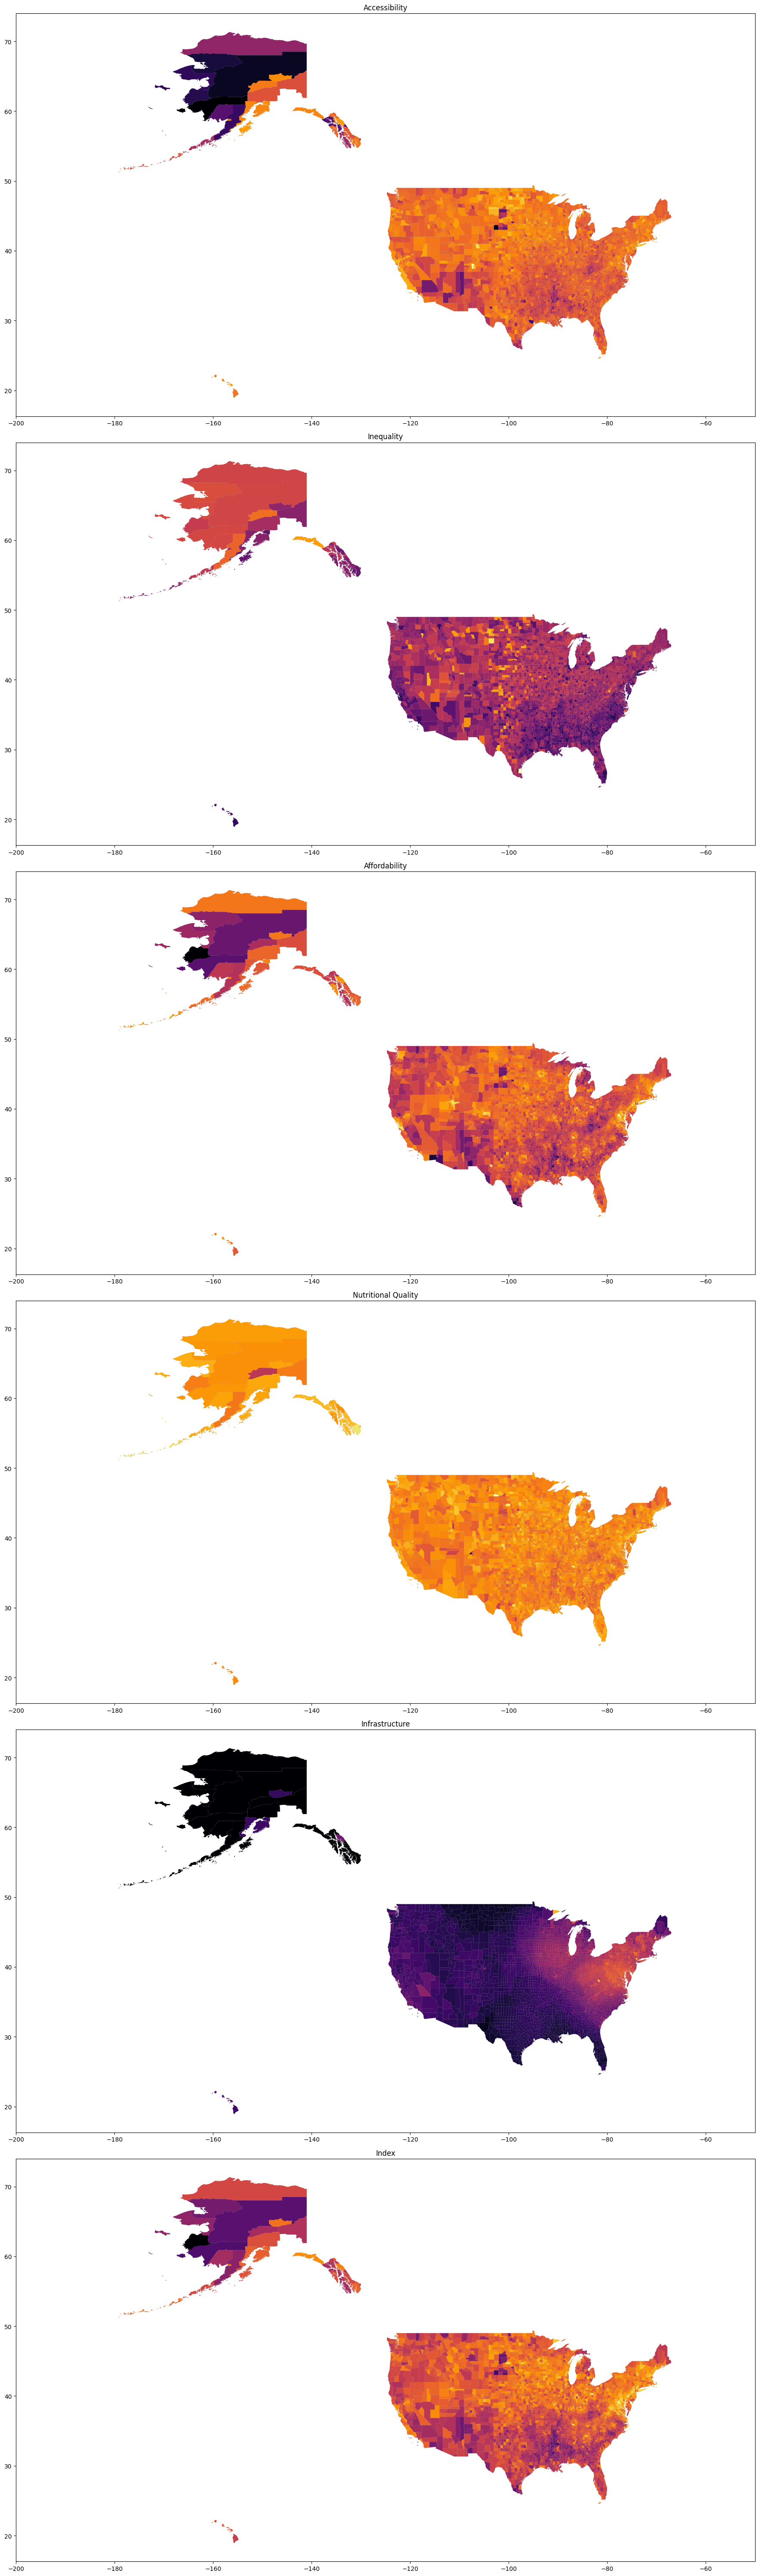

In [34]:
gdf = geopandas.GeoDataFrame(imputed_df, geometry=imputed_df["geometry"])

columns = list(index_dict.keys()) + ["Index"]

fig, axs = plt.subplots(len(columns), figsize=(40, 60))

for i, column in enumerate(columns):
    data = gdf[["geometry", column]]
    data.plot(color="k", alpha=0.3 ,ax=axs[i])
    data.plot(column=column, ax=axs[i], cmap = "inferno")
    axs[i].set_title(column)
    x_min = -200
    x_max = -50
    axs[i].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

In [35]:
df_zscore.to_excel("Zscored_variables.xlsx")